In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2 as cv

# Histogram of nodule sizes

In [3]:
# use path to full lidc data instead
dtype = {'patient_id':np.int32, 'nodule_no':np.int32, 'subtlety':np.int32, 'internalStructure':np.int32, 'calcification':np.int32, 'sphericity':np.int32, 'margin': np.int32, 'lobulation':np.int32, 'spiculation':np.int32, 'texture':np.int32, 'malignancy':np.int32, 'nod_sz_per_slice':'category'}
meta_df = pd.read_csv('LIDC_examples/meta/metadata.csv', index_col='patient_id')


In [5]:
def convertStrToListInt(row):
    intlist = [ int(num) for num in row[1:-1].split(', ') ]
    return intlist

In [6]:
allnums = []
for _, row in meta_df.iterrows():
    for num in row['nod_sz_per_slice'][1:-1].split(', '):
        if num:
            allnums.append(int(num))


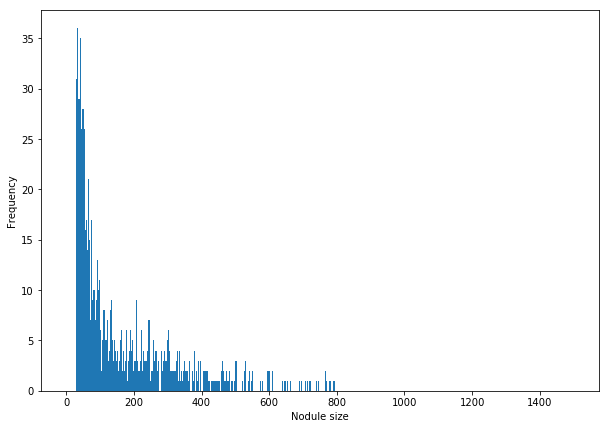

In [7]:
fig = plt.figure(figsize=(10,7))
plt.hist(allnums, bins=500, range=(0,1500))
plt.xlabel('Nodule size')
plt.ylabel('Frequency')
plt.show()
# right skewed distribution

# Average pixel intensity across dataset

In [8]:
# average pixel intensity histogram of entier dataset
def allHisto(file_loc):
    fnames = [i for i in glob.glob(file_loc)]
    s=np.array([np.array(cv.imread(fname, -1)) for fname in fnames])
    s_avg=np.mean(s, axis=0) 

    #plot histogram
    # print(s_avg.max(), s_avg.min())
    plt.hist(s_avg.ravel(),bins=256)
    plt.show()

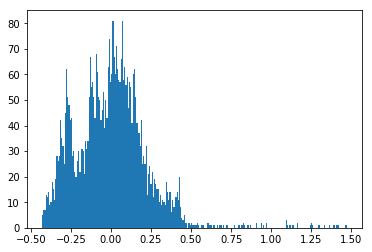

In [10]:
# change path
allHisto('/home/rhys/Documents/MScProj/NoisyLabelsMe/LIDC_examples/train/scans/*.tif')